## Change-one examination

In [10]:
%matplotlib inline
# %matplotlib notebook
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/experiments/best_model_comparison.csv', index_col=0)
df.head()

,loss,acc,perplexity,avs_dist,avs_l1,avs_l2,history,elapsed,config
best_model_comparison,,,,,,,,,
baseline,2.906309,0.328993,26.232250,0.558517,0.233415,0.138908,"{'loss': [4.911966800689697, 4.440345764160156...",865.664960,Config(audio_processing=AudioProcessingConfig(...
DDC,2.727055,0.352550,22.939154,0.538239,0.224342,0.133024,"{'loss': [4.789309024810791, 4.139768123626709...",634.933715,Config(audio_processing=AudioProcessingConfig(...
Custom word_id,5.691290,0.368768,29.614040,0.525282,0.219168,0.130185,"{'loss': [6.680080890655518, 6.544526100158691...",1159.531724,Config(audio_processing=AudioProcessingConfig(...
Custom word_vec,5.707817,0.368005,30.404902,0.525962,0.219708,0.130646,"{'loss': [6.567014217376709, 6.168761253356934...",588.619328,Config(audio_processing=AudioProcessingConfig(...
MLSTM,3.624487,0.368753,18.482679,0.525569,0.219054,0.130045,"{'loss': [5.958526134490967, 4.524765968322754...",1866.861410,Config(audio_processing=AudioProcessingConfig(...


In [11]:
def get_stats(df):
    ser = pd.Series()
    for col in df.select_dtypes(include=np.number).columns:
        ser[f'{col}_mean'] = df[col].mean()
        ser[f'{col}_std'] = df[col].std()
    return ser
    
res = df.groupby(df.index).apply(get_stats)
res.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,loss_mean,loss_std,acc_mean,acc_std,perplexity_mean,perplexity_std,avs_dist_mean,avs_dist_std,avs_l1_mean,avs_l1_std,avs_l2_mean,avs_l2_std,elapsed_mean,elapsed_std
best_model_comparison,,,,,,,,,,,,,,
Custom word_id,5.692013,0.005676,0.370785,0.002325,29.587330,0.114239,0.523272,0.001968,0.218286,0.000814,0.129574,0.000505,1104.387243,82.234465
Custom word_id shallow,5.758121,0.007885,0.358062,0.003034,34.223265,0.612421,0.534333,0.002461,0.223052,0.001256,0.132558,0.000865,657.405861,71.542323
Custom word_vec,5.707703,0.002230,0.368853,0.001369,30.240328,0.177146,0.525860,0.001329,0.219307,0.000555,0.130357,0.000408,671.080611,116.192011


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


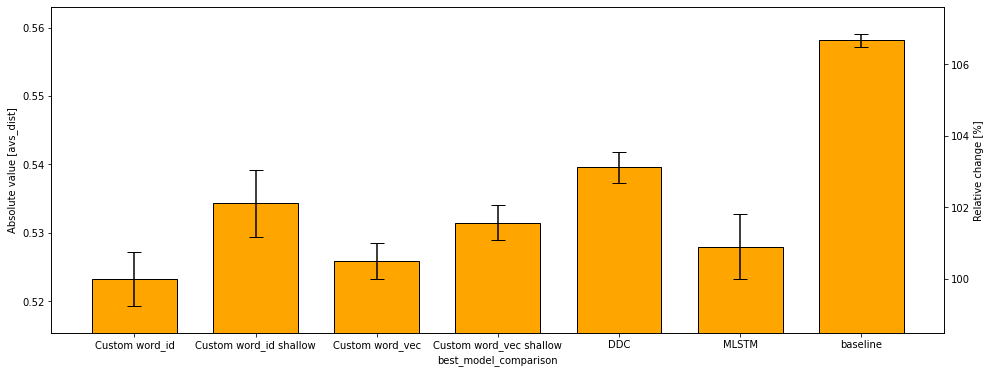

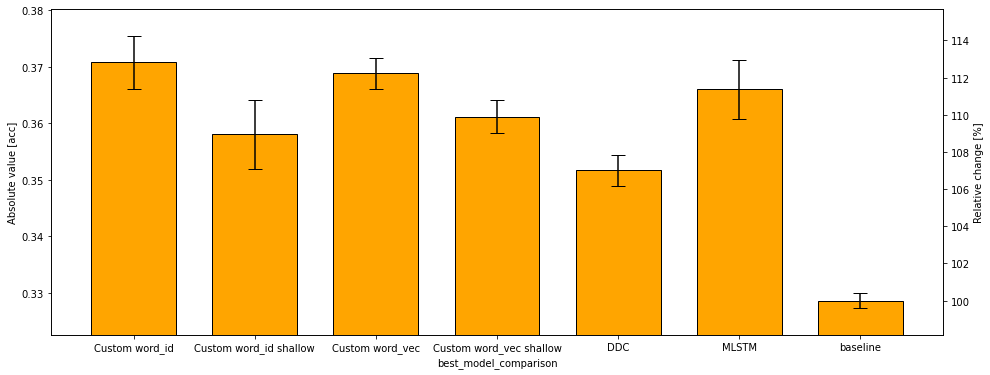

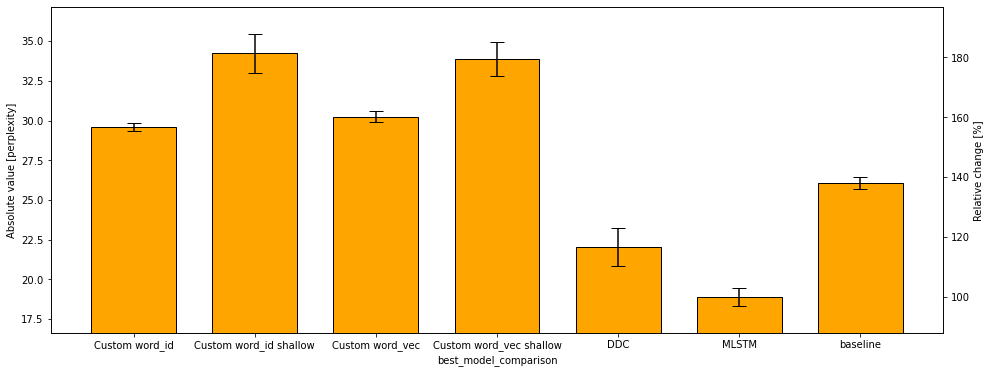

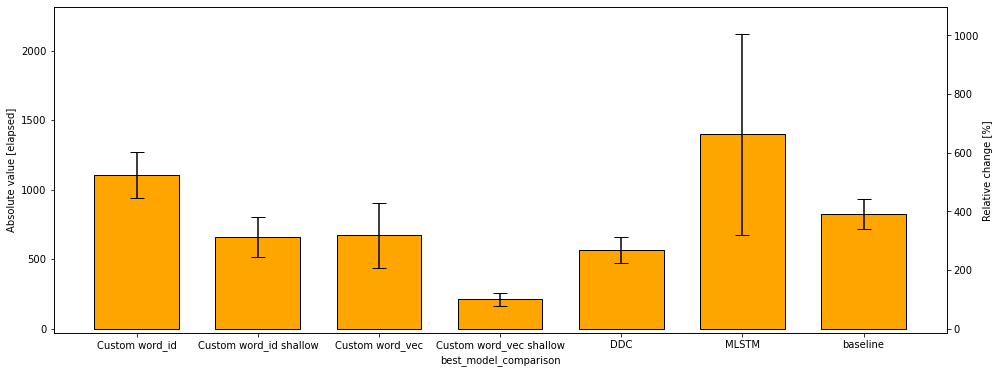

In [14]:
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import re

    
def plot_col(df, col, ylabel='', name=''):
    barWidth = 0.7
    mean = df[f'{col}_mean']
    norm_mean = mean / mean.min()
    yer = df[f'{col}_std'] * 2
    yer = yer.fillna(0)

    # The x position of bars
    x_pos = np.arange(len(mean))
    bot, top = (mean - yer).min(), (mean + yer).max()
    padding = (top - bot) * 0.1
    bot, top = bot - padding, top + padding
    
    
    fig = plt.figure(None, figsize=(16, 6,))
    
    ax = fig.add_subplot(1, 1, 1)
    
    # Create bars
    ax.bar(x_pos, mean, width = barWidth, color = 'orange', edgecolor = 'black', yerr=yer, capsize=7, label=f'{col}')

    # General layout
    ax.set_xticks([x for x in range(len(mean))]) # , df.index
#     ax.set_xticklabels([',\n'.join(str(x).split(',')) for x in df.index])
    ax.set_xticklabels([re.sub("['\[\]()]", '',
        re.sub(',', '\n', str(x))) for x in df.index])
    ax.set_xlabel(df.index.name)
    ax.set_ylabel(ylabel)
    ax.set_ylim(bot, top)
    ax.set_ylabel(f'Absolute value [{col}]')
    ax.set_title(name)
    
    ax2 = ax.twinx()

    ax2.set_ylabel('Relative change [%]')

    ax2.set_ylim(bot / mean.min() * 100, top / mean.min() * 100)
    
#     fig.legend()
    fig.show()

def plot_cols(df, cols, name=''):
#     display(Markdown(f'## {df.index.name}'))
    groupped_df = df.groupby(df.index).apply(get_stats)
    for col in cols:
        if col in df.columns:
            plot_col(groupped_df, col, name=name)


plot_cols(df, ['avs_dist', 'accuracy', 'acc', 'perplexity', 'elapsed'])

6.00 runs per hyperparam option   dense_repetition_tapering.csv


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


6.00 runs per hyperparam option       best_model_comparison.csv
7.00 runs per hyperparam option              cnn_repetition.csv
7.00 runs per hyperparam option                     dropout.csv
1.43 runs per hyperparam option         baseline_model_size.csv
7.00 runs per hyperparam option                  model_size.csv
3.00 runs per hyperparam option label_smoothing:mixup_alpha.csv
7.71 runs per hyperparam option                    x_groups.csv
3.00 runs per hyperparam option             label_smoothing.csv
7.00 runs per hyperparam option             lstm_repetition.csv
3.00 runs per hyperparam option                 mixup_alpha.csv


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


7.00 runs per hyperparam option            dense_repetition.csv
1.71 runs per hyperparam option    baseline_model_size_fail.csv


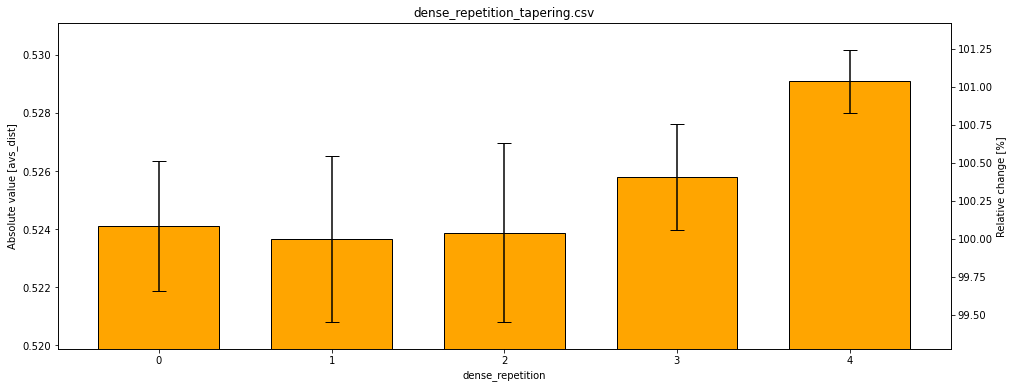

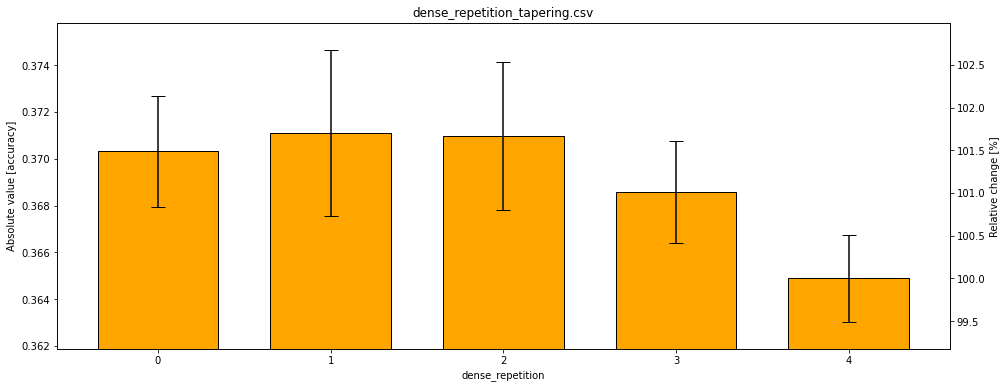

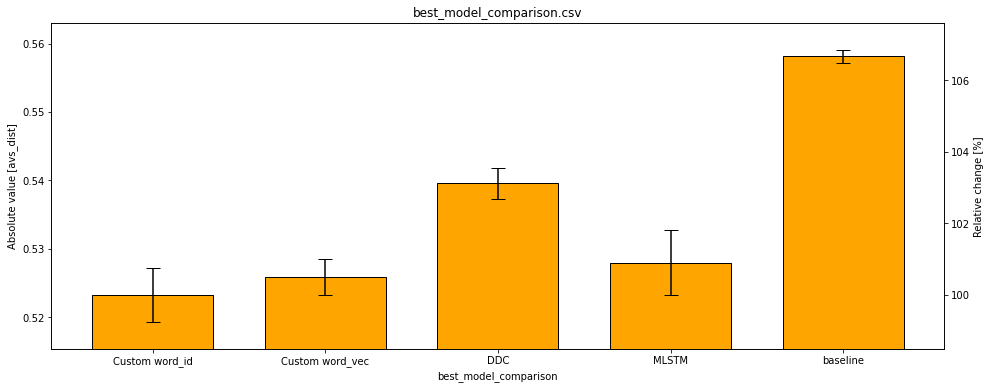

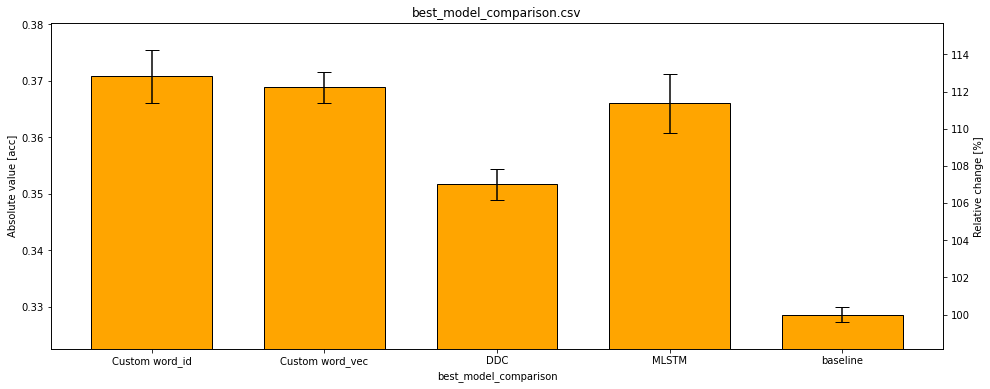

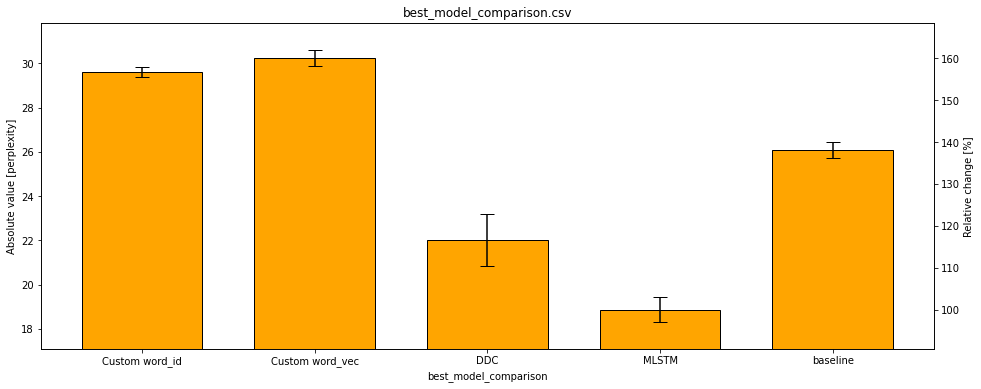

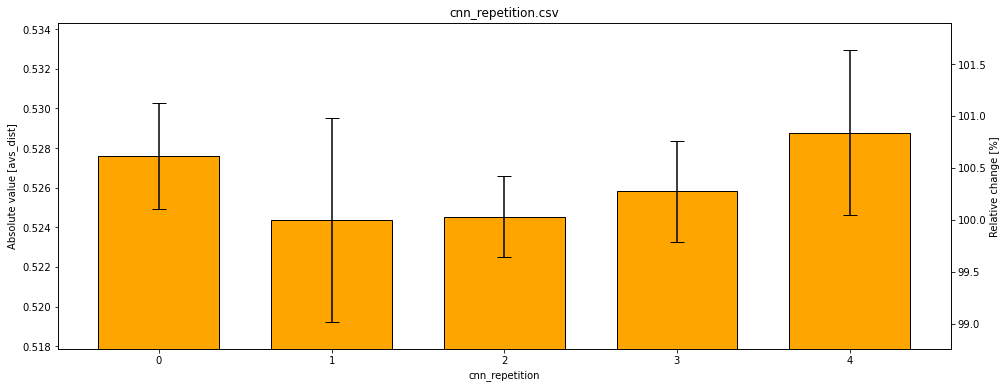

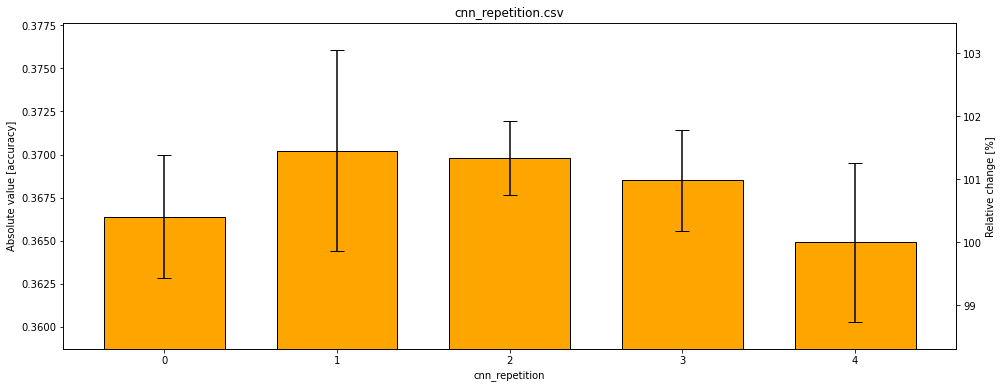

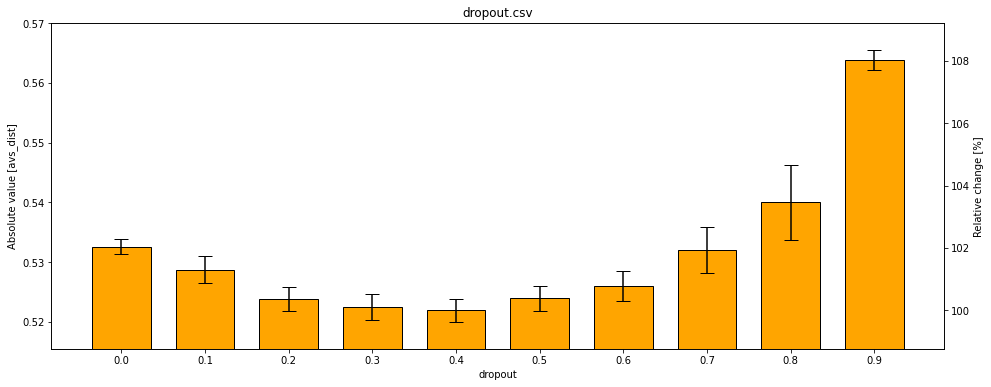

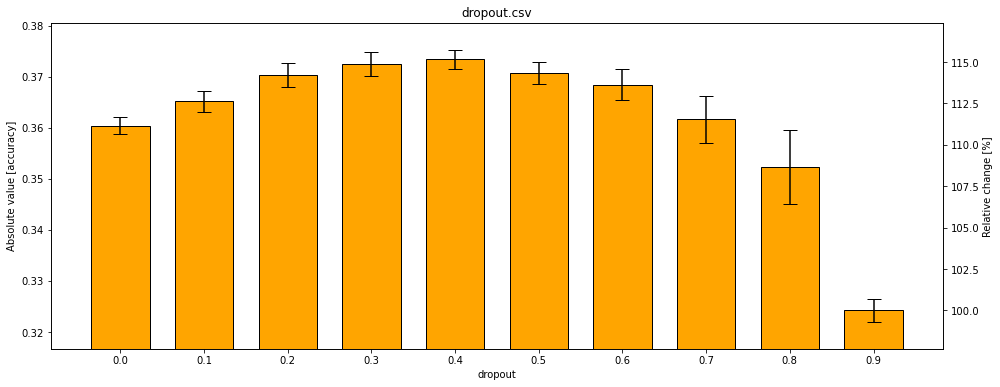

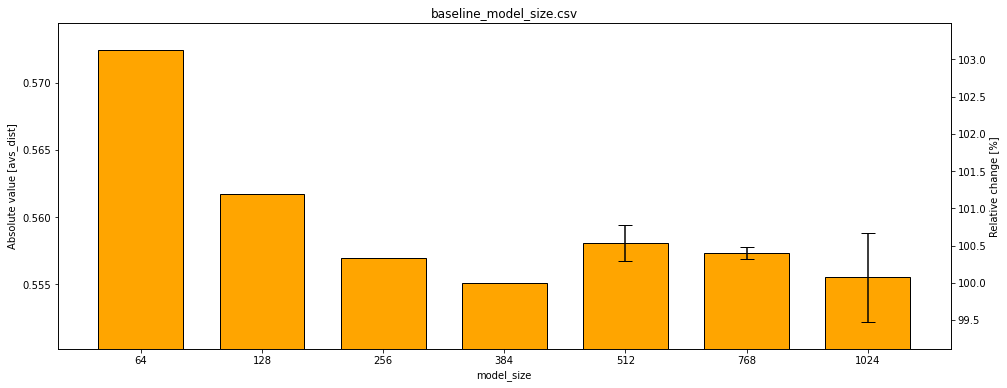

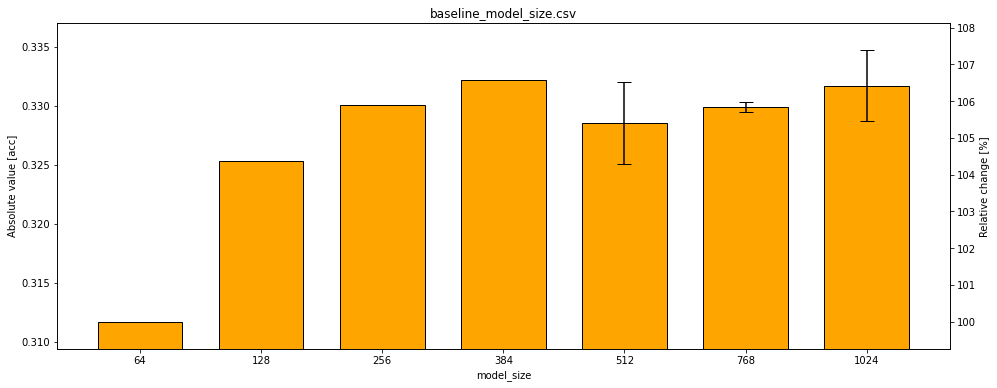

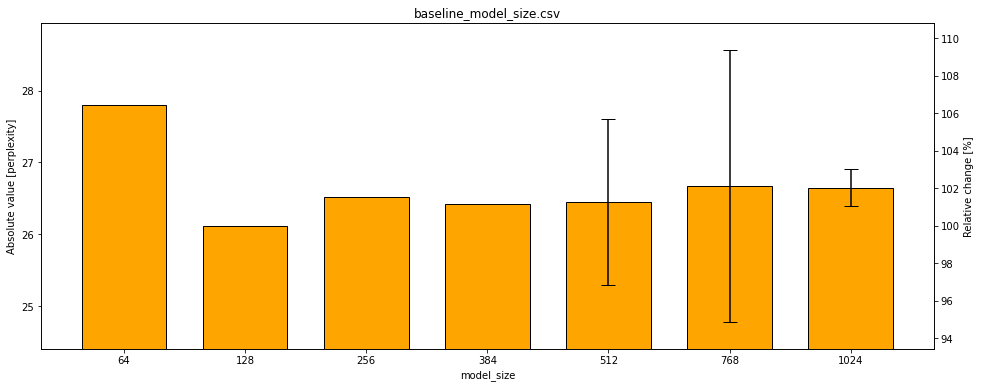

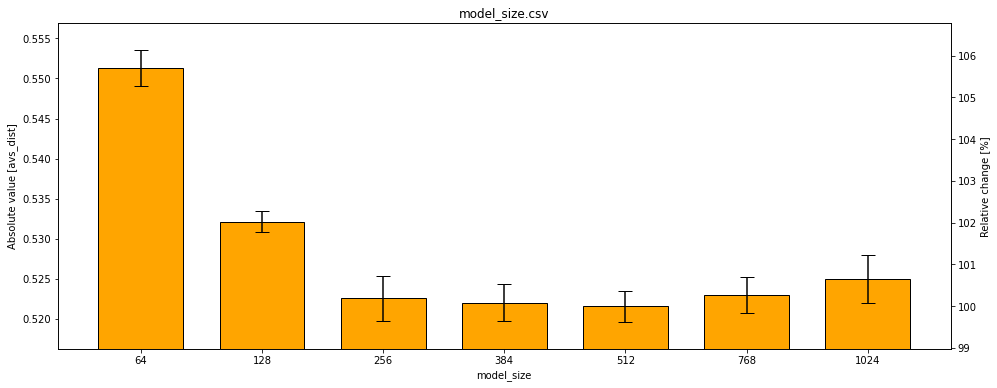

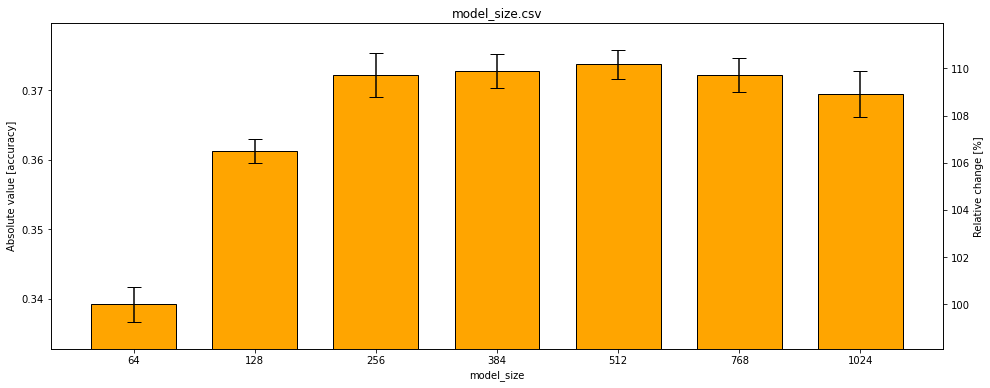

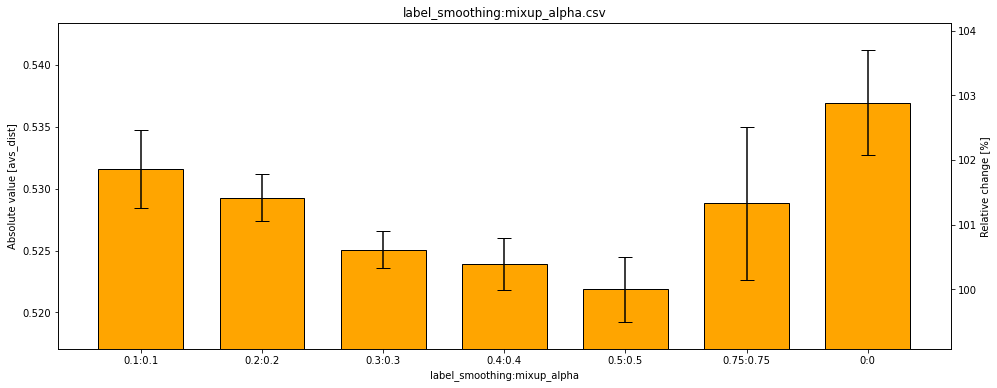

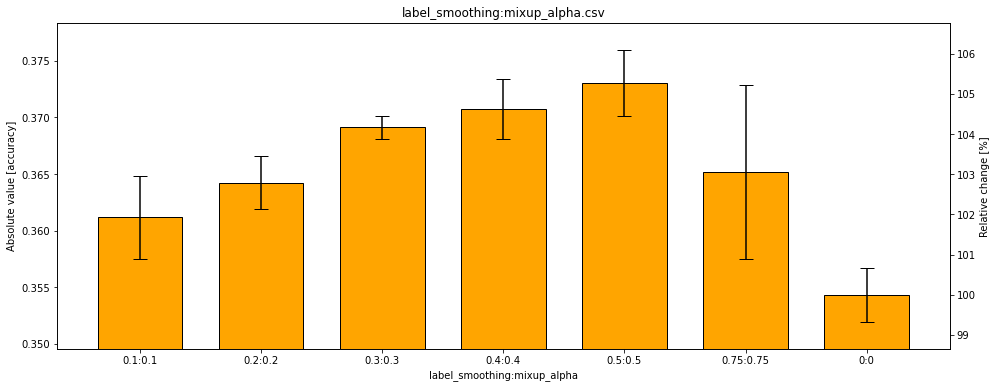

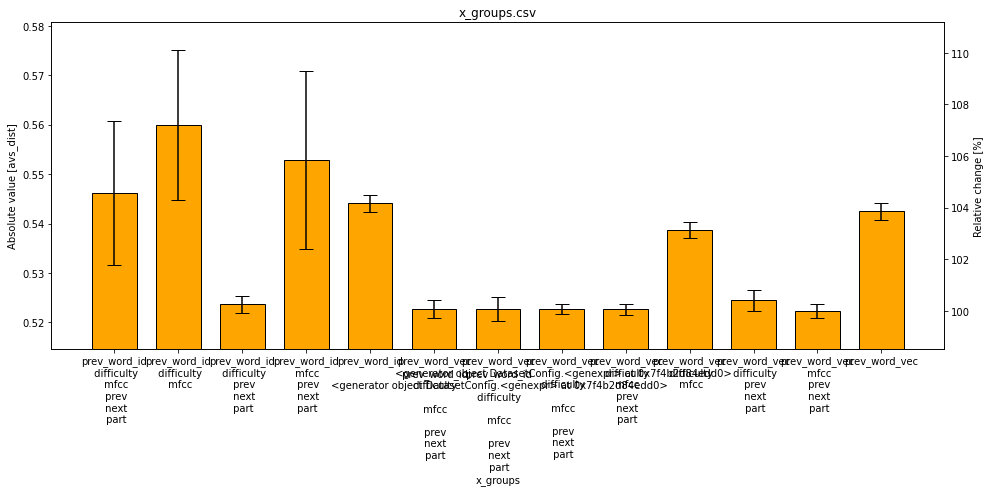

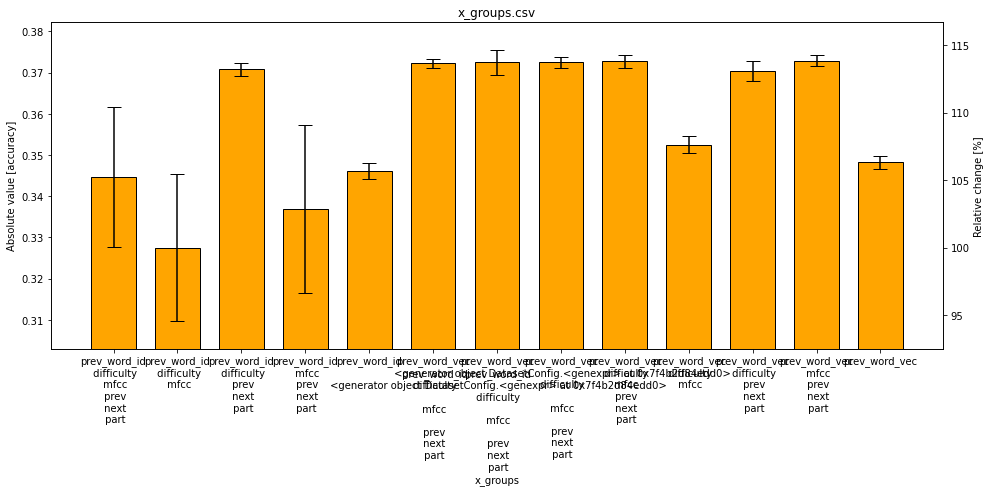

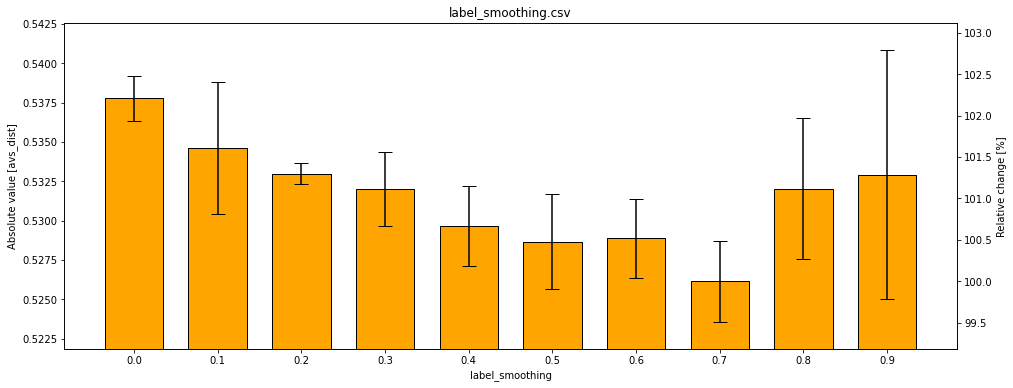

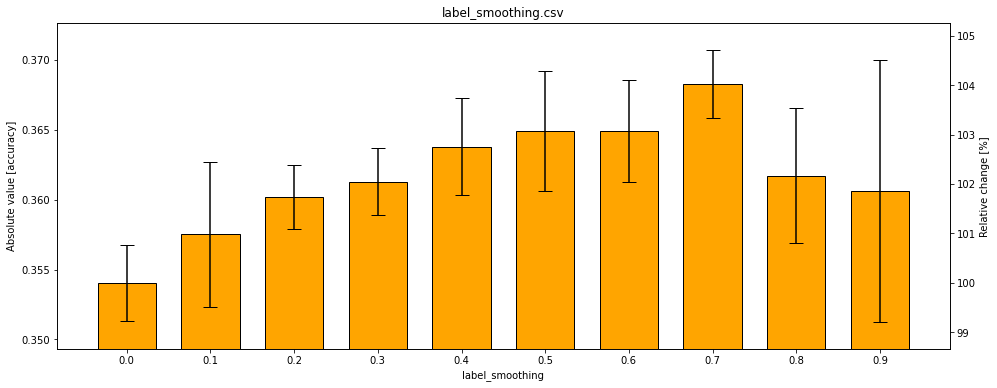

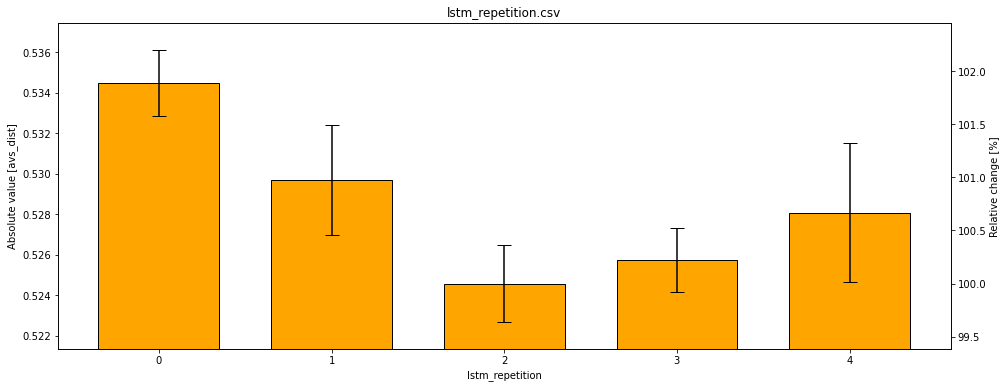

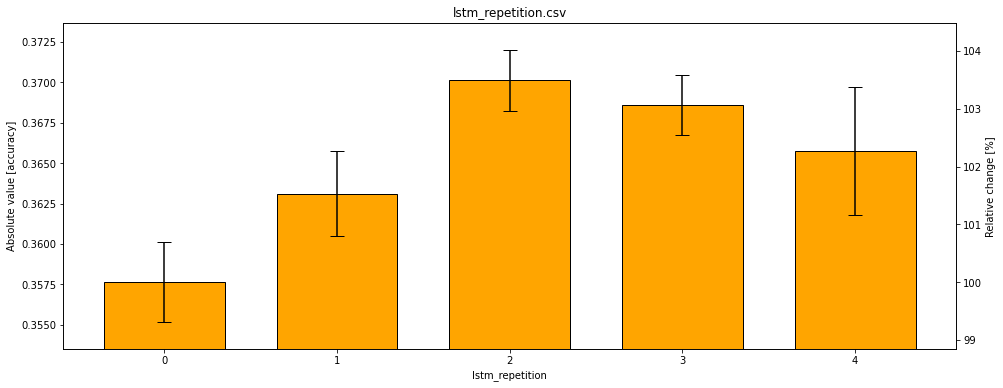

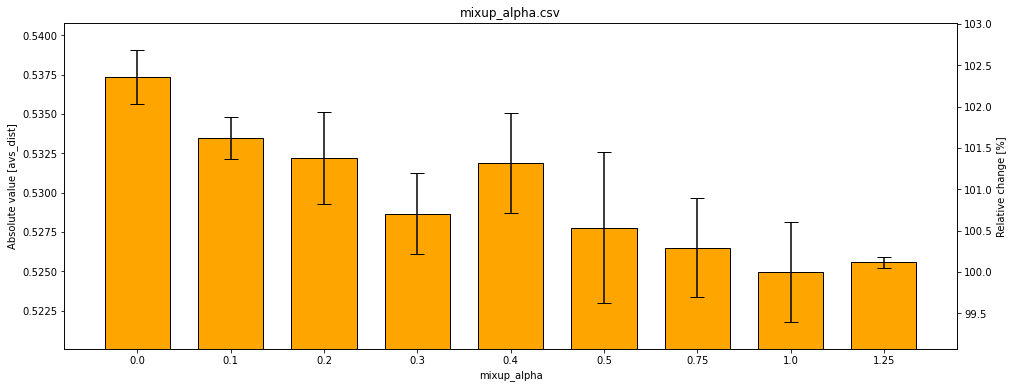

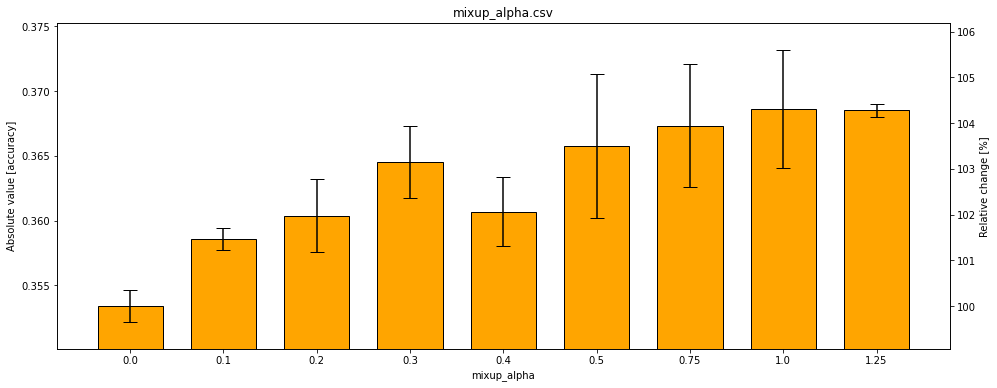

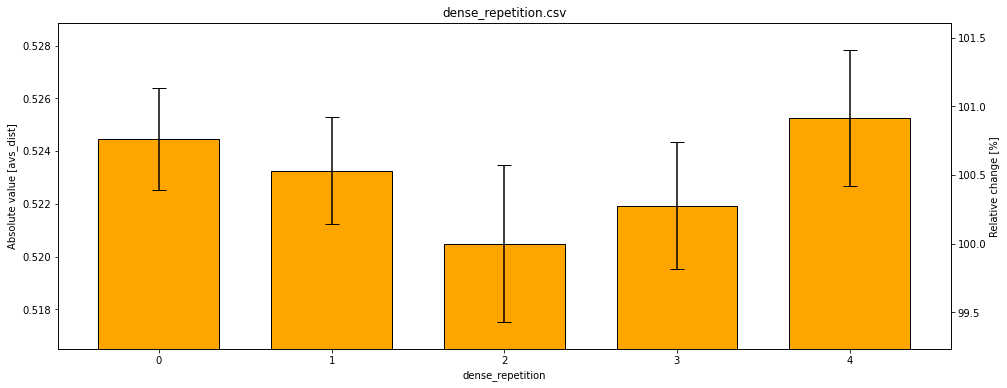

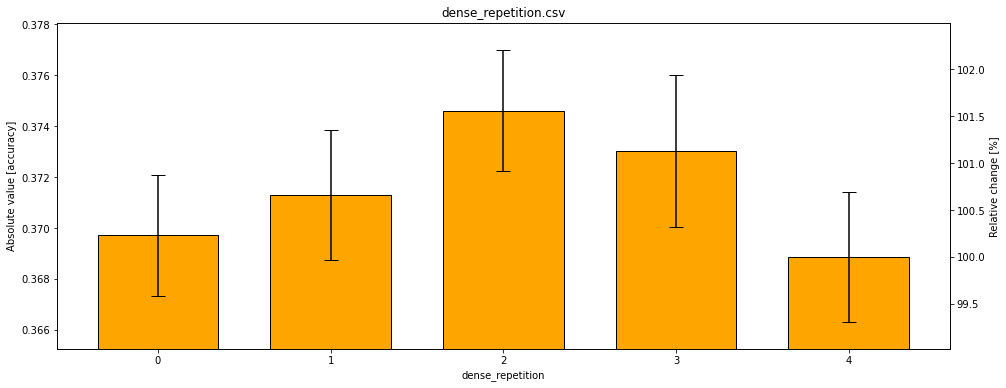

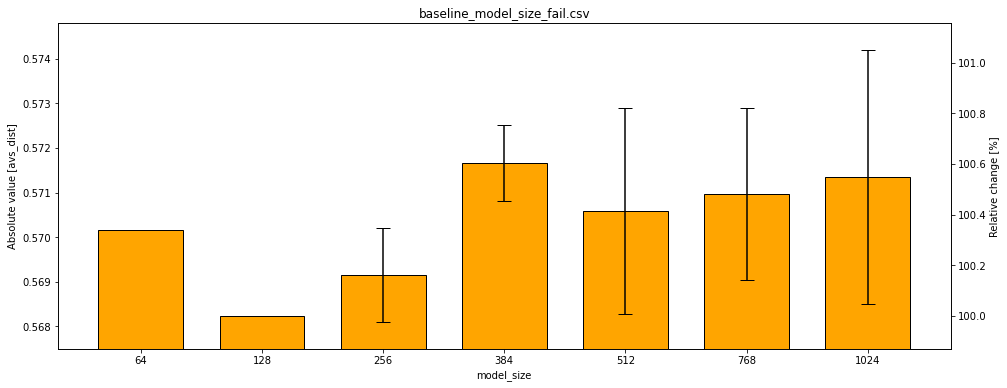

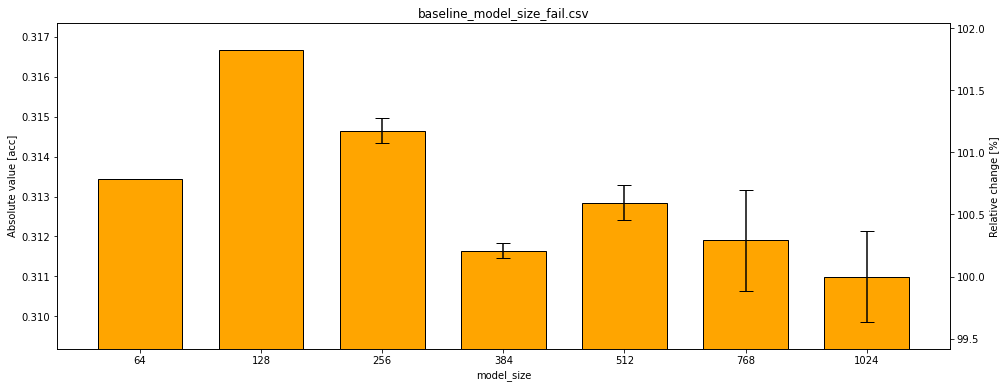

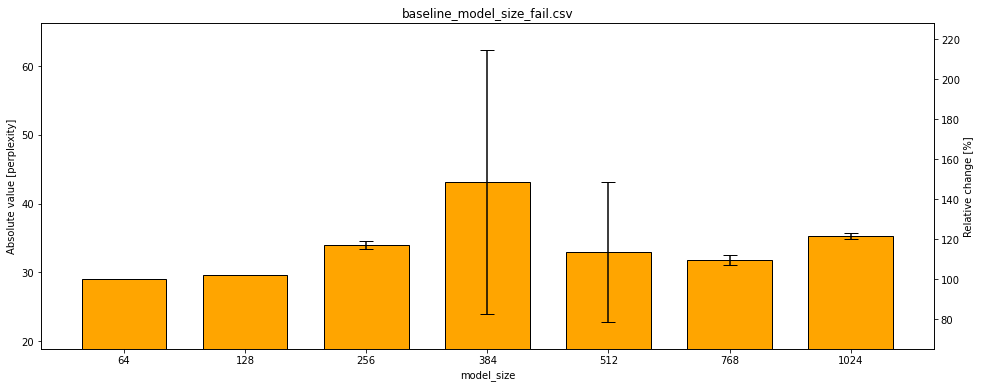

In [9]:
from pathlib import Path

experiments_path = Path('../../data/experiments')
for path in experiments_path.iterdir():
    if path.is_file() and path.suffix == '.csv':
        df = pd.read_csv(path, index_col=0)
        print(f'{len(df) / len(df.index.unique()):2.2f} runs per hyperparam option {str(path.name):>31}')
        plot_cols(df, ['avs_dist', 'accuracy', 'acc', 'perplexity'], path.name)

# Table comparison
Ready to be copied to the thesis!

In [20]:
res.head()

,loss_mean,loss_std,acc_mean,acc_std,perplexity_mean,perplexity_std,avs_dist_mean,avs_dist_std,avs_l1_mean,avs_l1_std,avs_l2_mean,avs_l2_std,elapsed_mean,elapsed_std
best_model_comparison,,,,,,,,,,,,,,
Custom word_id,5.692013,0.005676,0.370785,0.002325,29.587330,0.114239,0.523272,0.001968,0.218286,0.000814,0.129574,0.000505,1104.387243,82.234465
Custom word_id shallow,5.758121,0.007885,0.358062,0.003034,34.223265,0.612421,0.534333,0.002461,0.223052,0.001256,0.132558,0.000865,657.405861,71.542323
Custom word_vec,5.707703,0.002230,0.368853,0.001369,30.240328,0.177146,0.525860,0.001329,0.219307,0.000555,0.130357,0.000408,671.080611,116.192011
Custom word_vec shallow,5.746641,0.005794,0.361192,0.001433,33.862946,0.532778,0.531507,0.001253,0.221621,0.000517,0.131533,0.000325,210.980942,23.382814
DDC,2.712786,0.008419,0.351665,0.001384,22.034485,0.588263,0.539584,0.001147,0.224472,0.000418,0.133053,0.000260,564.515503,45.609304


In [48]:
df = pd.read_csv('../../data/experiments/best_model_comparison.csv', index_col=0)
df['acc'] *= 100
res = df.groupby(df.index).apply(get_stats)

res_dict = {}

col_formatting = {
    'perplexity': (1, 2),
    'acc': (1, 2),
    'avs_dist': (3, 3),
}
for col in col_formatting.keys():
    
    res_dict[col] = res[f'{col}_mean'].apply(lambda x: f'{x:.{col_formatting[col][0]}f}')\
                    + '$\pm' + res[f'{col}_std'].apply(lambda x: f'{x:.{col_formatting[col][1]}f}') + '$'

df_print = pd.DataFrame(res_dict)[['perplexity', 'acc', 'avs_dist']]
df_print = df_print.reindex(index=['baseline', 'DDC', 'Custom word_vec', 'Custom word_id', 'MLSTM'])
print(str(df_print))
df_print

                          perplexity            acc         avs_dist
best_model_comparison                                               
baseline               26.1$\pm0.18$  32.9$\pm0.06$  0.558$\pm0.000$
DDC                    22.0$\pm0.59$  35.2$\pm0.14$  0.540$\pm0.001$
Custom word_vec        30.2$\pm0.18$  36.9$\pm0.14$  0.526$\pm0.001$
Custom word_id         29.6$\pm0.11$  37.1$\pm0.23$  0.523$\pm0.002$
MLSTM                  18.9$\pm0.28$  36.6$\pm0.26$  0.528$\pm0.002$


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,perplexity,acc,avs_dist
best_model_comparison,,,
baseline,26.1$\pm0.18$,32.9$\pm0.06$,0.558$\pm0.000$
DDC,22.0$\pm0.59$,35.2$\pm0.14$,0.540$\pm0.001$
Custom word_vec,30.2$\pm0.18$,36.9$\pm0.14$,0.526$\pm0.001$
Custom word_id,29.6$\pm0.11$,37.1$\pm0.23$,0.523$\pm0.002$
MLSTM,18.9$\pm0.28$,36.6$\pm0.26$,0.528$\pm0.002$


In [65]:
import tensorflow as tf

y_pred = tf.convert_to_tensor(np.random.uniform(0, 1, (1, 10, 2)))
print(y_pred.shape)
dim = tf.reduce_prod(tf.shape(y_pred)[:-1])
flatten_y_pred = tf.reshape(y_pred, [dim, -1])

dim = tf.reduce_prod(tf.shape(y_pred)[1:])
flatten_y_pred = tf.reshape(y_pred, [-1, dim])
print(flatten_y_pred.shape)
flatten_y_pred, y_pred

(1, 10, 2)
tf.Tensor(10, shape=(), dtype=int32)
(10, 2)


(<tf.Tensor: shape=(10, 2), dtype=float64, numpy=
 array([[0.54520888, 0.64846469],
        [0.3206485 , 0.5696872 ],
        [0.9848413 , 0.17313858],
        [0.84983764, 0.93809517],
        [0.25004746, 0.78912684],
        [0.00557634, 0.83613058],
        [0.93394307, 0.58073961],
        [0.15816942, 0.18636944],
        [0.96109997, 0.52989592],
        [0.68088117, 0.96445751]])>,
 <tf.Tensor: shape=(1, 10, 2), dtype=float64, numpy=
 array([[[0.54520888, 0.64846469],
         [0.3206485 , 0.5696872 ],
         [0.9848413 , 0.17313858],
         [0.84983764, 0.93809517],
         [0.25004746, 0.78912684],
         [0.00557634, 0.83613058],
         [0.93394307, 0.58073961],
         [0.15816942, 0.18636944],
         [0.96109997, 0.52989592],
         [0.68088117, 0.96445751]]])>)